In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
pima = pd.read_csv("pima.csv")
pima = pima.sample(frac=1).reset_index(drop=True)

In [3]:
X = np.array(pima)[:,:-1]
X

array([[2.000e+00, 1.410e+02, 5.800e+01, 3.400e+01, 1.280e+02, 2.540e+01,
        6.990e-01, 2.400e+01],
       [7.000e+00, 8.100e+01, 7.800e+01, 4.000e+01, 4.800e+01, 4.670e+01,
        2.610e-01, 4.200e+01],
       [1.300e+01, 1.060e+02, 7.200e+01, 5.400e+01, 0.000e+00, 3.660e+01,
        1.780e-01, 4.500e+01],
       [5.000e+00, 4.400e+01, 6.200e+01, 0.000e+00, 0.000e+00, 2.500e+01,
        5.870e-01, 3.600e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [2.000e+00, 1.090e+02, 9.200e+01, 0.000e+00, 0.000e+00, 4.270e+01,
        8.450e-01, 5.400e+01],
       [1.100e+01, 1.380e+02, 7.600e+01, 0.000e+00, 0.000e+00, 3.320e+01,
        4.200e-01, 3.500e+01],
       [3.000e+00, 1.130e+02, 4.400e+01, 1.300e+01, 0.000e+00, 2.240e+01,
        1.400e-01, 2.200e+01],
       [1.000e+00, 1.220e+02, 9.000e+01, 5.100e+01, 2.200e+02, 4.970e+01,
        3.250e-01, 3.100e+01],
       [7.000e+00, 1.000e+02, 0.000e+00, 0.000e+00, 0.0

In [4]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

Y = pima.Outcome
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.10)

In [6]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(Accuracy(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Accuracy:{}".format(Accuracy(X_val, Y_val, weights)))
            
    return weights

In [7]:
def InitializeWeights(nodes):
    layers, weights = len(nodes), []
    
    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))
    
    return weights

In [8]:
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation) # Augment with bias
    
    return activations

In [9]:
def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal)
    
    for j in range(layers, 0, -1):
        currActivation = activations[j]
        
        if(j > 1):
            prevActivation = np.append(1, activations[j-1])
        else:
            prevActivation = activations[0]
        
        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w)
    
    return weights

In [10]:
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # Augment feature vector
        
        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers)

    return weights

In [11]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

In [12]:
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item)

    activations = ForwardPropagation(item, weights, layers)
    
    outputFinal = activations[-1].A1
    index = FindMaxActivation(outputFinal)

    y = [0 for i in range(len(outputFinal))]
    y[index] = 1
    return y


def FindMaxActivation(output):
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i
    
    return index

In [13]:
def Accuracy(X, Y, weights, display=False):
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)
        if display == True:
            print("\n\nInput:\n",x,"\nPredicted:\n",guess,"\nActual:\n",y)
        if(y == guess):
            correct += 1
        elif display == True:
            print("mispredicted")

    return correct / len(X)

In [14]:
f = len(X[0])
o = len(Y[0])

layers = [f, 6, 12, o]
lr, epochs = 0.15, 120

weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=layers, lr=lr);
print("Final weights:\n",weights)

Epoch 20
Training Accuracy:0.6944444444444444
Validation Accuracy:0.5
Epoch 40
Training Accuracy:0.6388888888888888
Validation Accuracy:0.5
Epoch 60
Training Accuracy:0.6388888888888888
Validation Accuracy:0.5
Epoch 80
Training Accuracy:0.6388888888888888
Validation Accuracy:0.5
Epoch 100
Training Accuracy:0.6388888888888888
Validation Accuracy:0.5
Epoch 120
Training Accuracy:0.6388888888888888
Validation Accuracy:0.5
Final weights:
 [matrix([[ 0.80727185,  0.72212309, -0.89553903,  0.07957729,  0.33676418,
          1.22699133, -0.25394636,  0.00805894,  0.4489616 ],
        [-0.44838602, -0.72553872,  0.73713709,  0.95037424, -0.90440351,
          2.04926507, -0.0505871 , -0.70365126,  0.70075909],
        [-0.58507007,  0.66275995, -0.19553254, -0.77008572, -0.90157562,
          0.0399853 ,  0.07214572,  0.67606312, -0.10328383],
        [-0.71643619, -0.64933216,  0.25856123, -0.4142929 ,  0.98403902,
          0.31896141,  0.38947501,  0.63211577,  0.76514096],
        [-0.25309

In [15]:
print("Testing Accuracy: {}".format(Accuracy(X_test, Y_test, weights, display = True)))



Input:
 [  5.    137.    108.      0.      0.     48.8     0.227  37.   ] 
Predicted:
 [1, 0] 
Actual:
 [0.0, 1.0]
mispredicted


Input:
 [  9.    171.    110.     24.    240.     45.4     0.721  54.   ] 
Predicted:
 [1, 0] 
Actual:
 [0.0, 1.0]
mispredicted


Input:
 [  1.    103.     30.     38.     83.     43.3     0.183  33.   ] 
Predicted:
 [1, 0] 
Actual:
 [1.0, 0.0]


Input:
 [ 6.    93.    50.    30.    64.    28.7    0.356 23.   ] 
Predicted:
 [1, 0] 
Actual:
 [1.0, 0.0]


Input:
 [ 3.    88.    58.    11.    54.    24.8    0.267 22.   ] 
Predicted:
 [1, 0] 
Actual:
 [1.0, 0.0]


Input:
 [  8.    125.     96.      0.      0.      0.      0.232  54.   ] 
Predicted:
 [1, 0] 
Actual:
 [0.0, 1.0]
mispredicted


Input:
 [  5.    116.     74.      0.      0.     25.6     0.201  30.   ] 
Predicted:
 [1, 0] 
Actual:
 [1.0, 0.0]


Input:
 [  4.    110.     92.      0.      0.     37.6     0.191  30.   ] 
Predicted:
 [1, 0] 
Actual:
 [1.0, 0.0]


Input:
 [  1.    103.     80.     11.  

In [16]:
Y_result = []
Converted = []
Actual = []
Prediction = []
for x in X_test:
    guess = Predict(x,weights)
    Y_result.append(guess)
    for i in range(len(guess)):
        if guess[i] ==1:
            Converted.append(i)
for i in range(len(Y_test)):
    for j in range(len(Y_test[0])):
        if Y_test[i][j] ==1:
            Actual.append(j)
            
print("R2 Score: %f" % r2_score(Y_test,Y_result))
print("\nClassification Report:\n")
print(classification_report(Y_test,Y_result))
print("\nConfusion Matrix:\n")
print(confusion_matrix(Actual, Converted))

R2 Score: -0.538462

Classification Report:

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

   micro avg       0.65      0.65      0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20
 samples avg       0.65      0.65      0.65        20


Confusion Matrix:

[[13  0]
 [ 7  0]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


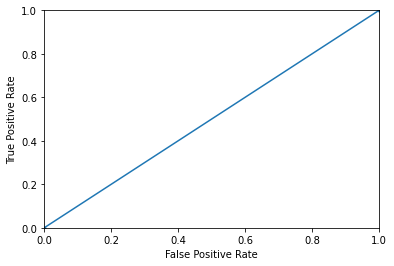

In [17]:
ytest, yresult = [], []
for i in range(len(Y_test)):
    ytest.append(Y_test[i][0])
    yresult.append(Y_result[i][0])
    
fpr, tpr, thresholds = roc_curve(ytest, yresult)

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, marker='.')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
plot_roc_curve(fpr,tpr)